In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

# DTSC Project 2: 
* Name: Jason Ortiz
* NYIT ID: 1258640
* Due: 12/12/2022 @ 11:59PM
* Professor: Kiran Balgani

In [47]:
original_spam_df = pd.read_csv('spam.csv', sep=',')

In [48]:
original_spam_df

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.101,0.0,0.000,0.000,0.00,1.857,16,52,ham
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.443,0.0,0.221,0.665,0.00,3.812,15,61,spam
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.000,1,3,ham
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.218,0.0,0.218,0.000,0.00,1.687,10,27,ham


In [49]:
original_spam_df.shape

(4601, 58)

In [50]:
original_spam_df.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [51]:
original_spam_df["Class"].unique()

array(['ham', 'spam'], dtype=object)

Indicates this is a Binary Classification Problem ^

In [52]:
non_class_features = original_spam_df.columns.delete(-1)
non_class_features

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total'],
      dtype='object')

In [53]:
spam_training_set, spam_test_set = train_test_split(original_spam_df, test_size=0.7826559, random_state=99)

In [54]:
spam_training_data, spam_training_target = spam_training_set[non_class_features], spam_training_set['Class']
spam_test_data, spam_test_target = spam_test_set[non_class_features], spam_test_set['Class']

In [55]:
print(f'{spam_training_data.shape = }\n{spam_test_data.shape = }')

spam_training_data.shape = (1000, 57)
spam_test_data.shape = (3601, 57)


In [56]:
spam_training_data.head()
#spam_training_target.head()
#spam_test_data.head()
#spam_test_target.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
466,0.00,0.0,0.87,0.0,0.00,0.0,0.00,0.0,0.00,0.87,...,0.0,0.0,0.608,0.0,0.000,0.000,0.0,2.941,11,100
1663,0.00,0.0,0.44,0.0,1.32,0.0,0.44,0.0,0.00,1.32,...,0.0,0.0,0.301,0.0,0.301,0.000,0.0,2.787,19,131
46,0.00,0.0,1.58,0.0,0.00,0.0,0.00,0.0,0.00,0.00,...,0.0,0.0,0.149,0.0,0.149,0.000,0.0,1.482,10,43
3499,0.33,0.0,1.65,0.0,0.99,0.0,0.33,0.0,0.66,1.32,...,0.0,0.0,0.000,0.0,0.859,0.101,0.0,337.250,1146,1349
1163,0.00,0.0,0.31,0.0,0.00,0.0,0.00,0.0,0.00,0.00,...,0.0,0.0,0.588,0.0,0.000,0.000,0.0,3.183,55,191


In [57]:
def rate_classifier(test_target_data, test_target_predict):
    cm = confusion_matrix(test_target_data, test_target_predict)

    terminology = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    percentages = ["{0:0.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(terminology, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(10,7))
    sb.heatmap(cm/np.sum(cm), annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')

    print("Classification Report\n", classification_report(test_target_data, test_target_predict))

    print("Accuracy Score\n", accuracy_score(test_target_data, test_target_predict))

## Fused Majority Voting Rule Classifier

In [ ]:
decision_tree_classifier = DecisionTreeClassifier().fit(spam_training_data, spam_training_target)
gauss_nb_MJVT = GaussianNB().fit(spam_training_data, spam_training_target)
# max_iter of 1191 required for Logistic Regression to Converge
logistic_regression_MJVT = LogisticRegression(max_iter=1191).fit(spam_training_data, spam_training_target)

In [ ]:
majority_voting_classifier = VotingClassifier(estimators=[('DT', decision_tree_classifier), ('GNB', gauss_nb_MJVT), ('LR', logistic_regression_MJVT)], voting='hard')
majority_voting_classifier = majority_voting_classifier.fit(spam_training_data, spam_training_target)
majority_voting_classifier_predict = majority_voting_classifier.predict(spam_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.93      0.94      2188
        spam       0.89      0.91      0.90      1413

    accuracy                           0.92      3601
   macro avg       0.92      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601

Accuracy Score
 0.9216884198833657


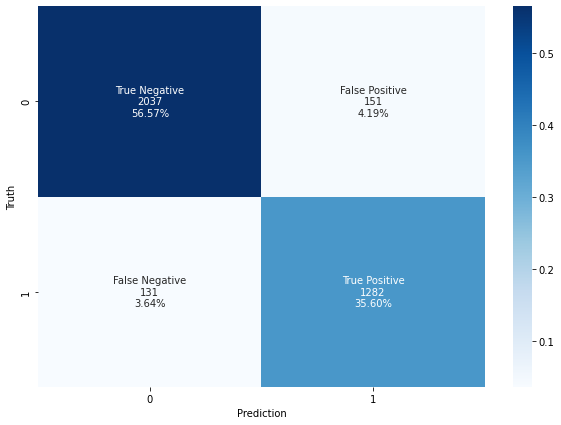

In [ ]:
rate_classifier(spam_test_target, majority_voting_classifier_predict)

## Task 1 
Compare the accuracies of the fused model with AdaBoost Ensemble with Decision Tree as the base learner. Train the classifiers using the first 1000 instances and use the remaining 3601 for testing. [25 points]

In [ ]:
ada_boost_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(spam_training_data, spam_training_target)
ada_boost_classifier_predict = ada_boost_classifier.predict(spam_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.90      0.91      0.91      2188
        spam       0.86      0.85      0.86      1413

    accuracy                           0.89      3601
   macro avg       0.88      0.88      0.88      3601
weighted avg       0.89      0.89      0.89      3601

Accuracy Score
 0.8872535406831435


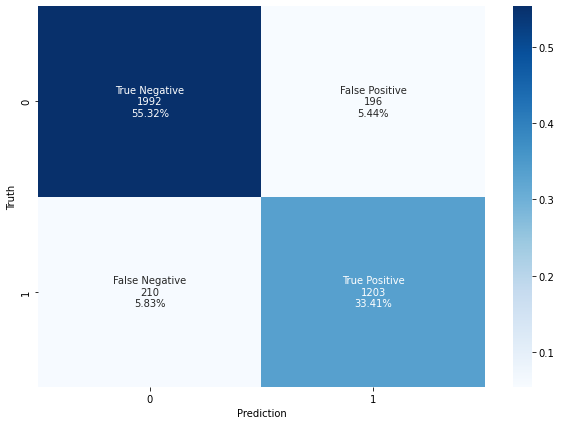

In [ ]:
rate_classifier(spam_test_target, ada_boost_classifier_predict)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.93      0.94      2188
        spam       0.89      0.91      0.90      1413

    accuracy                           0.92      3601
   macro avg       0.92      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601

Accuracy Score
 0.9216884198833657


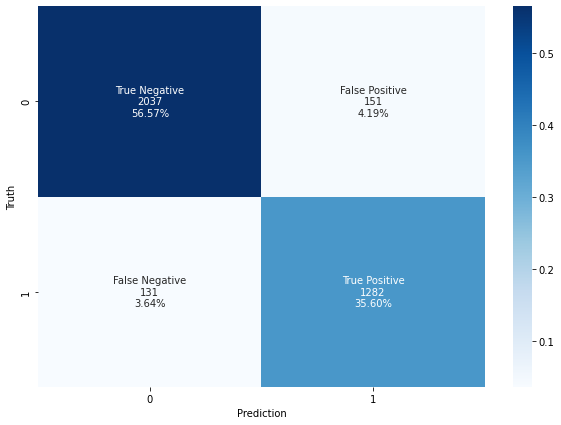

In [ ]:
rate_classifier(spam_test_target, majority_voting_classifier_predict)

The Majority Voting Classifier performed better than the ADA_Boost Classifier, with a higher accuracy and lower False Positive/Negative Rate

## Task 2 
Compare the accuracies of the fused model with Random Forest (with 1000 base learners). Train the classifiers using the first 1000 instances and use the remaining 3601 for testing. [25 points]

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=1000).fit(spam_training_data, spam_training_target)
random_forest_classifier_predict = random_forest_classifier.predict(spam_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.93      0.97      0.95      2188
        spam       0.95      0.89      0.92      1413

    accuracy                           0.94      3601
   macro avg       0.94      0.93      0.93      3601
weighted avg       0.94      0.94      0.94      3601

Accuracy Score
 0.937239655651208


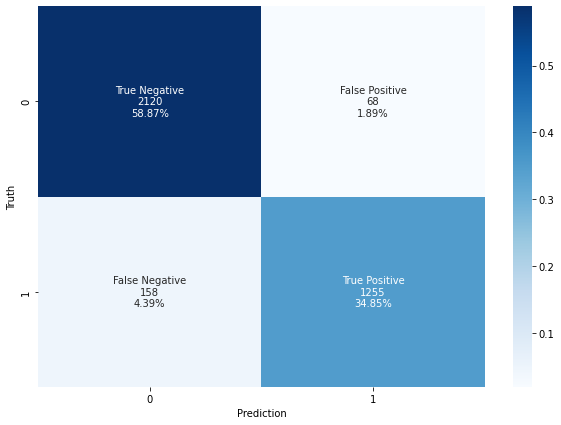

In [ ]:
rate_classifier(spam_test_target, random_forest_classifier_predict)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.93      0.94      2188
        spam       0.89      0.91      0.90      1413

    accuracy                           0.92      3601
   macro avg       0.92      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601

Accuracy Score
 0.9216884198833657


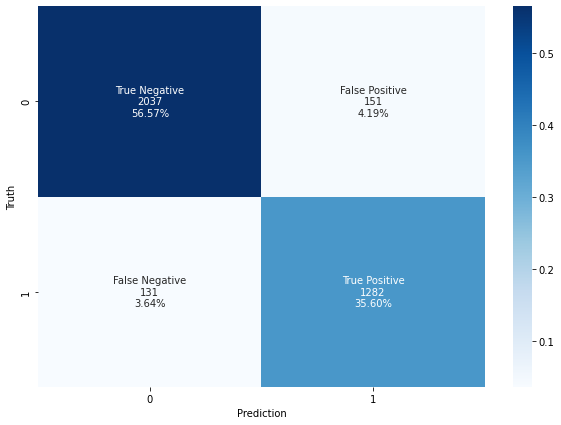

In [ ]:
rate_classifier(spam_test_target, majority_voting_classifier_predict)

The Random Forest Classifier performed better than the Majority Voting Classifier, with a higher accuracy and lower False Positive, however it had a higher False Negative Rate by 0.97%

### Task 3.1
* 50%-50% split

Majority Voting 50%-50%

In [ ]:
mv_50_50_train_set, mv_50_50_test_set = train_test_split(original_spam_df, test_size=0.50, random_state=99)

In [ ]:
mv_50_50_training_data, mv_50_50_training_target = mv_50_50_train_set[non_class_features], mv_50_50_train_set['Class']
mv_50_50_test_data, mv_50_50_test_target = mv_50_50_test_set[non_class_features], mv_50_50_test_set['Class']

In [ ]:
print(f'{mv_50_50_training_data.shape = }\n{mv_50_50_test_data.shape = }')

mv_50_50_training_data.shape = (2300, 57)
mv_50_50_test_data.shape = (2301, 57)


In [ ]:
decision_tree_mv_50_50 = DecisionTreeClassifier().fit(mv_50_50_training_data, mv_50_50_training_target)
gauss_nb_mv_50_50 = GaussianNB().fit(mv_50_50_training_data, mv_50_50_training_target)
# max_iter of 1191 required for Logistic Regression to Converge
logistic_regression_mv_50_50 = LogisticRegression(max_iter=5000).fit(mv_50_50_training_data, mv_50_50_training_target)

In [ ]:
mv_50_50_classifier = VotingClassifier(estimators=[('DT', decision_tree_mv_50_50), ('GNB', gauss_nb_mv_50_50), ('LR', logistic_regression_mv_50_50)], voting='hard')
mv_50_50_classifier = mv_50_50_classifier.fit(mv_50_50_training_data, mv_50_50_training_target)
mv_50_50_classifier_predict = mv_50_50_classifier.predict(mv_50_50_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.93      0.94      1380
        spam       0.90      0.91      0.91       921

    accuracy                           0.92      2301
   macro avg       0.92      0.92      0.92      2301
weighted avg       0.92      0.92      0.92      2301

Accuracy Score
 0.924380704041721


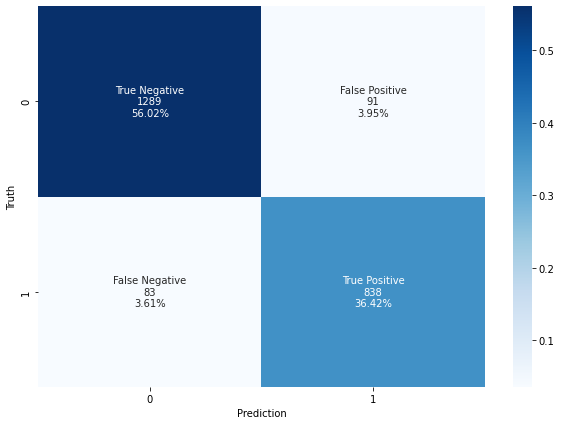

In [ ]:
rate_classifier(mv_50_50_test_target, mv_50_50_classifier_predict)

ADA Boost 50%-50%

In [ ]:
ada_50_50_train_set, ada_50_50_test_set = train_test_split(original_spam_df, test_size=0.50, random_state=99)

In [ ]:
ada_50_50_training_data, ada_50_50_training_target = ada_50_50_train_set[non_class_features], ada_50_50_train_set['Class']
ada_50_50_test_data, ada_50_50_test_target = ada_50_50_test_set[non_class_features], ada_50_50_test_set['Class']

In [ ]:
print(f'{ada_50_50_training_data.shape = }\n{ada_50_50_test_data.shape = }')

ada_50_50_training_data.shape = (2300, 57)
ada_50_50_test_data.shape = (2301, 57)


In [ ]:
ada_boost_50_50_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(ada_50_50_training_data, ada_50_50_training_target)
ada_boost_50_50_classifier_predict = ada_boost_50_50_classifier.predict(ada_50_50_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.93      0.96      0.95      1380
        spam       0.94      0.89      0.92       921

    accuracy                           0.93      2301
   macro avg       0.94      0.93      0.93      2301
weighted avg       0.93      0.93      0.93      2301

Accuracy Score
 0.933941764450239


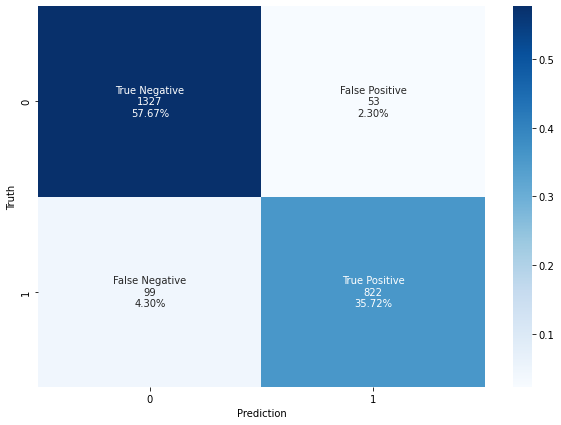

In [ ]:
rate_classifier(ada_50_50_test_target, ada_boost_50_50_classifier_predict)

### Task 3.2
* 60%-40% split

Majority Voting 60%-40%

In [ ]:
mv_60_40_train_set, mv_60_40_test_set = train_test_split(original_spam_df, test_size=0.40, random_state=99)

In [ ]:
mv_60_40_training_data, mv_60_40_training_target = mv_60_40_train_set[non_class_features], mv_60_40_train_set['Class']
mv_60_40_test_data, mv_60_40_test_target = mv_60_40_test_set[non_class_features], mv_60_40_test_set['Class']

In [ ]:
print(f'{mv_60_40_training_data.shape = }\n{mv_60_40_test_data.shape = }')

mv_50_50_training_data.shape = (2300, 57)
mv_50_50_test_data.shape = (2301, 57)


In [ ]:
decision_tree_mv_60_40 = DecisionTreeClassifier().fit(mv_60_40_training_data, mv_60_40_training_target)
gauss_nb_mv_60_40 = GaussianNB().fit(mv_60_40_training_data, mv_60_40_training_target)
logistic_regression_mv_60_40 = LogisticRegression(max_iter=5000).fit(mv_60_40_training_data, mv_60_40_training_target)

In [ ]:
mv_60_40_classifier = VotingClassifier(estimators=[('DT', decision_tree_mv_60_40), ('GNB', gauss_nb_mv_60_40), ('LR', logistic_regression_mv_60_40)], voting='hard')
mv_60_40_classifier = mv_60_40_classifier.fit(mv_60_40_training_data, mv_60_40_training_target)
mv_60_40_classifier_predict = mv_60_40_classifier.predict(mv_60_40_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.93      0.94      1380
        spam       0.90      0.91      0.91       921

    accuracy                           0.92      2301
   macro avg       0.92      0.92      0.92      2301
weighted avg       0.92      0.92      0.92      2301

Accuracy Score
 0.924380704041721


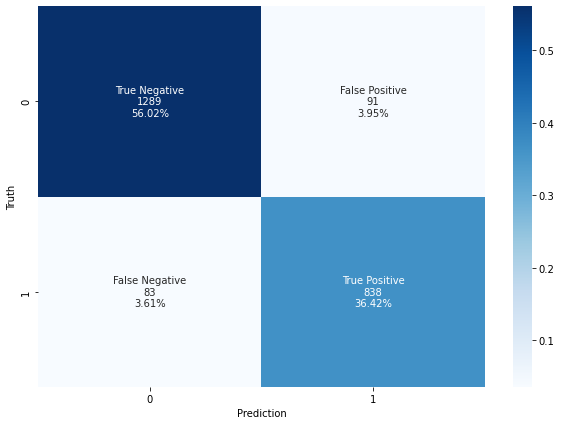

In [ ]:
rate_classifier(mv_60_40_test_target, mv_60_40_classifier_predict)

ADA Boost 60%-40%

In [ ]:
ada_60_40_train_set, ada_60_40_test_set = train_test_split(original_spam_df, test_size=0.40, random_state=99)

In [ ]:
ada_60_40_training_data, ada_60_40_training_target = ada_60_40_train_set[non_class_features], ada_60_40_train_set['Class']
ada_60_40_test_data, ada_60_40_test_target = ada_60_40_test_set[non_class_features], ada_60_40_test_set['Class']

In [ ]:
print(f'{ada_60_40_training_data.shape = }\n{ada_60_40_test_data.shape = }')

ada_50_50_training_data.shape = (2300, 57)
ada_50_50_test_data.shape = (2301, 57)


In [ ]:
ada_boost_60_40_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(ada_60_40_training_data, ada_60_40_training_target)
ada_boost_60_40_classifier_predict = ada_boost_60_40_classifier.predict(ada_60_40_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.93      0.96      0.95      1380
        spam       0.94      0.89      0.92       921

    accuracy                           0.93      2301
   macro avg       0.94      0.93      0.93      2301
weighted avg       0.93      0.93      0.93      2301

Accuracy Score
 0.933941764450239


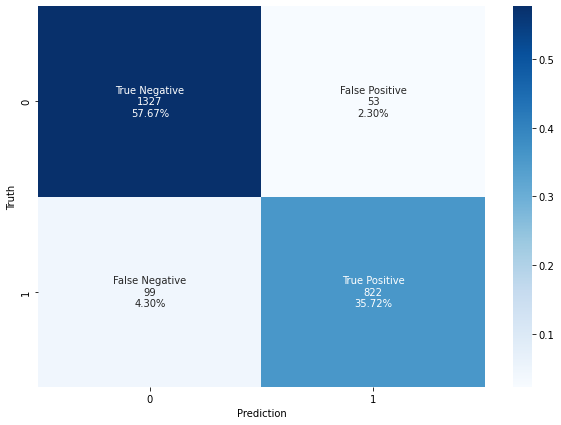

In [ ]:
rate_classifier(ada_60_40_test_target, ada_boost_60_40_classifier_predict)

### Task 3.3
* 70%-30% split

Majority Voting 70%-70%

In [ ]:
mv_70_30_train_set, mv_70_30_test_set = train_test_split(original_spam_df, test_size=0.30, random_state=99)

In [ ]:
mv_70_30_training_data, mv_70_30_training_target = mv_70_30_train_set[non_class_features], mv_70_30_train_set['Class']
mv_70_30_test_data, mv_70_30_test_target = mv_70_30_test_set[non_class_features], mv_70_30_test_set['Class']

In [ ]:
print(f'{mv_70_30_training_data.shape = }\n{mv_70_30_test_data.shape = }')

mv_50_50_training_data.shape = (2300, 57)
mv_50_50_test_data.shape = (2301, 57)


In [ ]:
decision_tree_mv_70_30 = DecisionTreeClassifier().fit(mv_70_30_training_data, mv_70_30_training_target)
gauss_nb_mv_70_30 = GaussianNB().fit(mv_70_30_training_data, mv_70_30_training_target)
logistic_regression_mv_70_30 = LogisticRegression(max_iter=5000).fit(mv_70_30_training_data, mv_70_30_training_target)

In [ ]:
mv_70_30_classifier = VotingClassifier(estimators=[('DT', decision_tree_mv_70_30), ('GNB', gauss_nb_mv_70_30), ('LR', logistic_regression_mv_70_30)], voting='hard')
mv_70_30_classifier = mv_70_30_classifier.fit(mv_70_30_training_data, mv_70_30_training_target)
mv_70_30_classifier_predict = mv_70_30_classifier.predict(mv_70_30_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.93      0.94      1380
        spam       0.90      0.91      0.91       921

    accuracy                           0.92      2301
   macro avg       0.92      0.92      0.92      2301
weighted avg       0.92      0.92      0.92      2301

Accuracy Score
 0.924380704041721


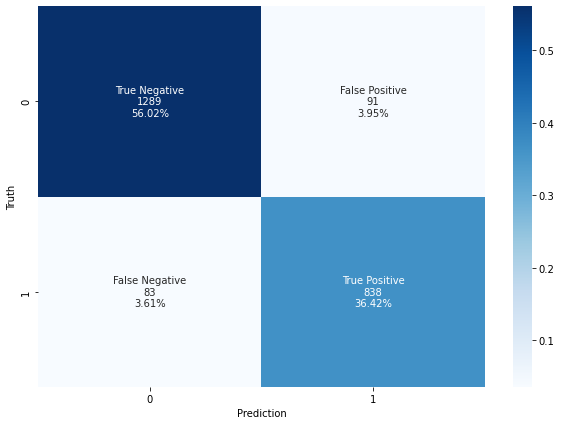

In [ ]:
rate_classifier(mv_70_30_test_target, mv_70_30_classifier_predict)

ADA Boost 70%-30%

In [58]:
ada_70_30_train_set, ada_70_30_test_set = train_test_split(original_spam_df, test_size=0.30, random_state=99)

In [59]:
ada_70_30_training_data, ada_70_30_training_target = ada_70_30_train_set[non_class_features], ada_70_30_train_set['Class']
ada_70_30_test_data, ada_70_30_test_target = ada_70_30_test_set[non_class_features], ada_70_30_test_set['Class']

In [60]:
print(f'{ada_70_30_training_data.shape = }\n{ada_70_30_test_data.shape = }')

ada_70_30_training_data.shape = (3220, 57)
ada_70_30_test_data.shape = (1381, 57)


In [61]:
ada_boost_70_30_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(ada_70_30_training_data, ada_70_30_training_target)
ada_boost_70_30_classifier_predict = ada_boost_70_30_classifier.predict(ada_70_30_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.95      0.97      0.96       842
        spam       0.95      0.93      0.94       539

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381

Accuracy Score
 0.9536567704561911


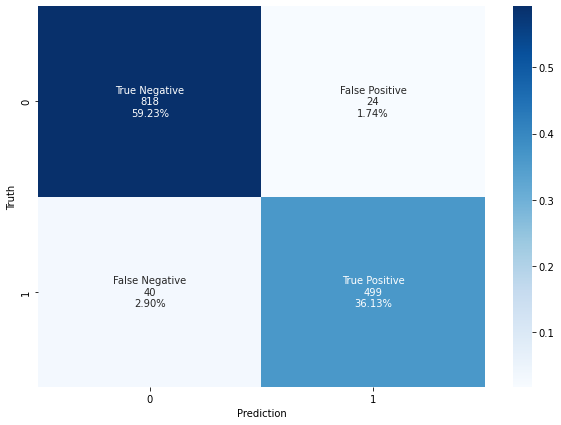

In [62]:
rate_classifier(ada_70_30_test_target, ada_boost_70_30_classifier_predict)

### Task 3.3
* 80%-20% split

Majority Voting 80%-20%

In [ ]:
mv_80_20_train_set, mv_80_20_test_set = train_test_split(original_spam_df, test_size=0.20, random_state=99)

In [ ]:
mv_80_20_training_data, mv_80_20_training_target = mv_80_20_train_set[non_class_features], mv_80_20_train_set['Class']
mv_80_20_test_data, mv_80_20_test_target = mv_80_20_test_set[non_class_features], mv_80_20_test_set['Class']

In [ ]:
print(f'{mv_80_20_training_data.shape = }\n{mv_80_20_test_data.shape = }')

mv_50_50_training_data.shape = (2300, 57)
mv_50_50_test_data.shape = (2301, 57)


In [ ]:
decision_tree_mv_80_20 = DecisionTreeClassifier().fit(mv_80_20_training_data, mv_80_20_training_target)
gauss_nb_mv_80_20 = GaussianNB().fit(mv_80_20_training_data, mv_80_20_training_target)
logistic_regression_mv_80_20 = LogisticRegression(max_iter=5000).fit(mv_80_20_training_data, mv_80_20_training_target)

In [ ]:
mv_80_20_classifier = VotingClassifier(estimators=[('DT', decision_tree_mv_80_20), ('GNB', gauss_nb_mv_80_20), ('LR', logistic_regression_mv_80_20)], voting='hard')
mv_80_20_classifier = mv_80_20_classifier.fit(mv_80_20_training_data, mv_80_20_training_target)
mv_80_20_classifier_predict = mv_80_20_classifier.predict(mv_80_20_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.93      0.94      1380
        spam       0.90      0.91      0.91       921

    accuracy                           0.92      2301
   macro avg       0.92      0.92      0.92      2301
weighted avg       0.92      0.92      0.92      2301

Accuracy Score
 0.924380704041721


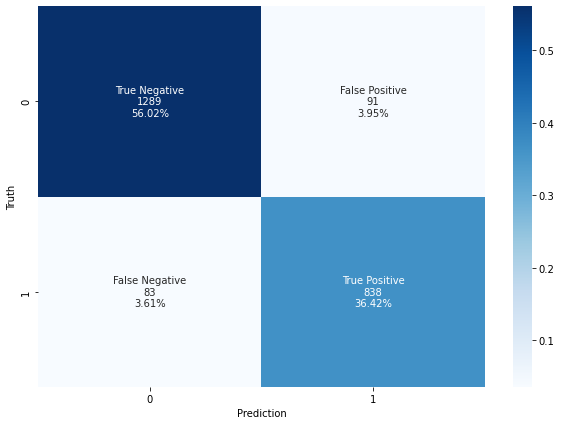

In [ ]:
rate_classifier(mv_80_20_test_target, mv_80_20_classifier_predict)

ADA Boost 80%-20%

In [ ]:
ada_80_20_train_set, ada_80_20_test_set = train_test_split(original_spam_df, test_size=0.20, random_state=99)

In [ ]:
ada_80_20_training_data, ada_80_20_training_target = ada_80_20_train_set[non_class_features], ada_80_20_train_set['Class']
ada_80_20_test_data, ada_80_20_test_target = ada_80_20_test_set[non_class_features], ada_80_20_test_set['Class']

In [ ]:
print(f'{ada_80_20_training_data.shape = }\n{ada_80_20_test_data.shape = }')

ada_70_30_training_data.shape = (3220, 57)
ada_70_30_test_data.shape = (1381, 57)


In [ ]:
ada_boost_80_20_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(ada_80_20_training_data, ada_80_20_training_target)
ada_boost_80_20_classifier_predict = ada_boost_80_20_classifier.predict(ada_80_20_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.95      0.97      0.96       842
        spam       0.95      0.93      0.94       539

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381

Accuracy Score
 0.9536567704561911


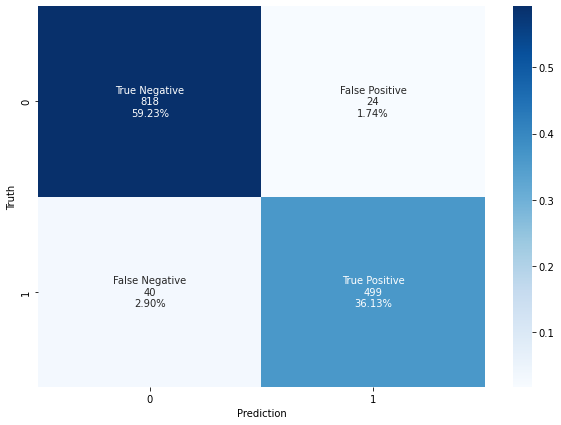

In [ ]:
rate_classifier(ada_80_20_test_target, ada_boost_80_20_classifier_predict)